In [1]:
% matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sb

sb.set_style("darkgrid", {"axes.facecolor": ".9"})
sb.set_context("talk")

In [2]:
import pandas as pd
import numpy as np

In [3]:
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.discrete.discrete_model as smDiscrete

In [4]:
DF0 = pd.read_csv('combined_WeatherEDvisitData_2006-2014.csv',index_col=0)

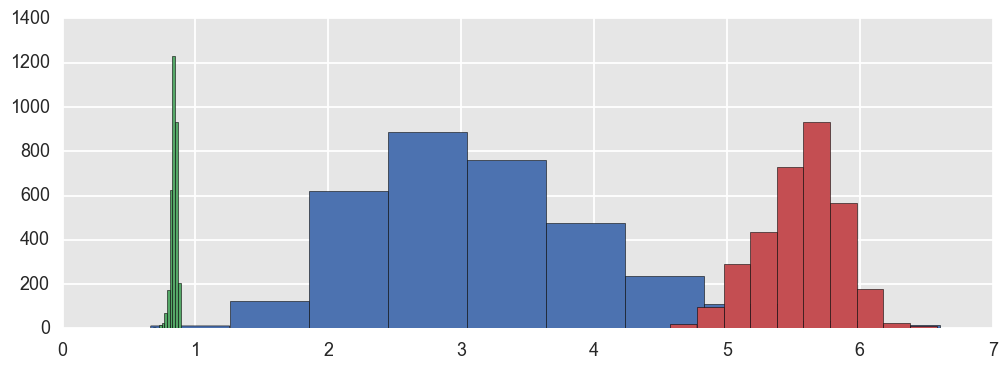

In [5]:
plt.figure(figsize=[12,4]);
(DF0['Daily Mean PM2.5 Concentration']**0.5).hist();
(DF0['Mean Daily Max 8-hr Ozone Concentration']**0.05).hist();
np.log(DF0['Total_Count']).hist();

In [6]:
# plt.scatter((DF0['Mean Daily Max 8-hr Ozone Concentration']), (DF0['Count_(Age_group_0-4)'])) ;
# plt.scatter((DF0['Mean Daily Max 8-hr Ozone Concentration']), (DF0['Count_(Age_group_5-17)'])) ;
# plt.scatter((DF0['Mean Daily Max 8-hr Ozone Concentration']), (DF0['Count_(Age_group_18-64)'])) ;
# plt.scatter((DF0['Mean Daily Max 8-hr Ozone Concentration']), (DF0['Count_(Age_group_65+)'])) ;
# plt.scatter((DF0['Daily Mean PM2.5 Concentration']), (DF0['Count_(Age_group_0-4)'])) ;
# plt.scatter((DF0['Daily Mean PM2.5 Concentration']), (DF0['Count_(Age_group_5-17)'])) ;
# plt.scatter((DF0['Daily Mean PM2.5 Concentration']), (DF0['Count_(Age_group_18-64)'])) ;
# plt.scatter((DF0['Daily Mean PM2.5 Concentration']), (DF0['Count_(Age_group_65+)'])) ;

# TIME-LAG PARTICLE DATA WITH COUNTS?

In [7]:
# DF0[sum5priordays_PM25conc] = DF0['Daily Mean PM2.5 Concentration']
DF0['sqrt_DmeanPM25conc'] = DF0['Daily Mean PM2.5 Concentration']**0.5
DF0['sqrt_DmeanOzoneconc'] = DF0['Mean Daily Max 8-hr Ozone Concentration']**0.5
DF0['ln_PRCP'] = np.log(DF0['PRCP (in)'])
DF0['ln_SD'] = np.log(DF0['SD'])
DF0['Tcount_abvMedian'] = (DF0.Total_Count>DF0.Total_Count.median()).astype(int)
DF0['ln_Tcount'] = np.log(DF0['Total_Count'])

DF0.columns

Index(['Date', 'YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
       'SD', 'TAVE (C)', 'SNOW (in)', 'PRCP (in)',
       'Mean Daily Max 8-hr Ozone Concentration',
       'Daily Mean PM2.5 Concentration', 'Total_Count',
       'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
       'Count_(Age_group_18-64)', 'Count_(Age_group_65+)',
       'sqrt_DmeanPM25conc', 'sqrt_DmeanOzoneconc', 'ln_PRCP', 'ln_SD',
       'Tcount_abvMedian', 'ln_Tcount'],
      dtype='object')

In [8]:
DF = DF0[['YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
       'SD','PRCP (in)', 'ln_PRCP', 'ln_SD',
       'Mean Daily Max 8-hr Ozone Concentration',
       'Daily Mean PM2.5 Concentration', 
        'sqrt_DmeanPM25conc','sqrt_DmeanOzoneconc',
       'Tcount_abvMedian','Total_Count', 'ln_Tcount',
       'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
       'Count_(Age_group_18-64)', 'Count_(Age_group_65+)']]

In [9]:
# http://seaborn.pydata.org/examples/scatterplot_matrix.html
# sb.set()
# sb.pairplot(DF);

In [10]:
corrmat = DF.corr()

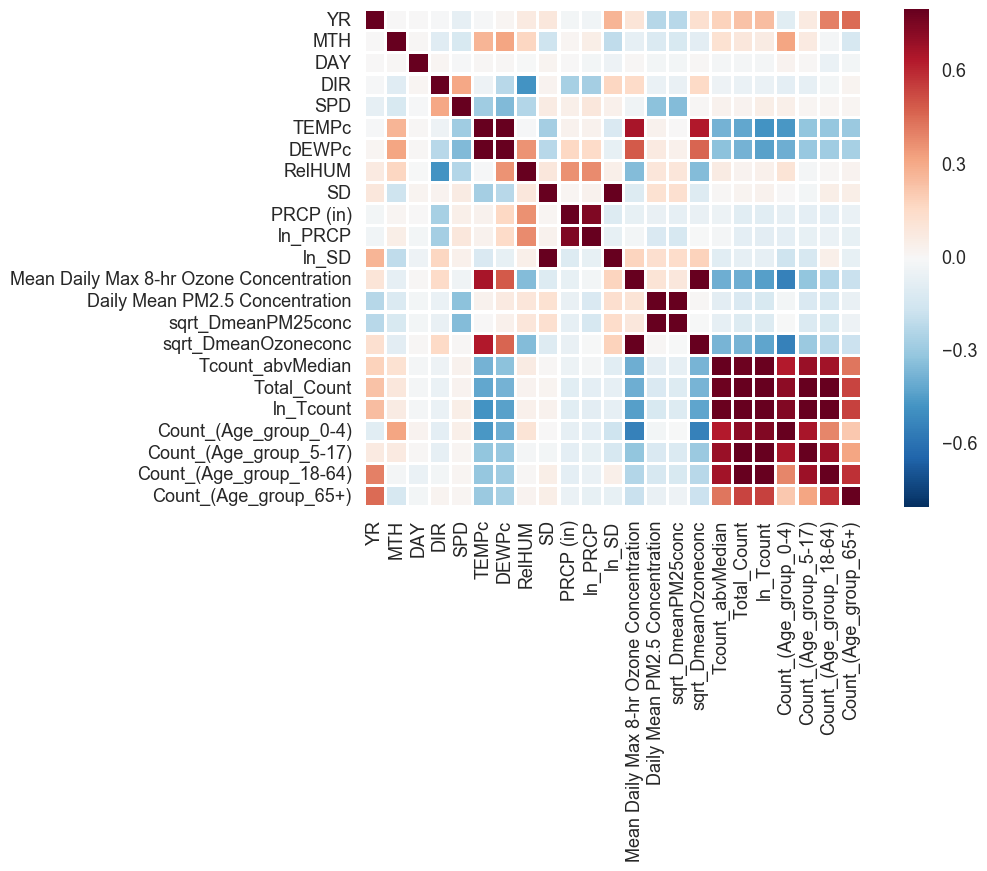

In [11]:
f, ax = plt.subplots(figsize=(12, 9))
# corrmat.columns.get_level_values()
sb.heatmap(corrmat, vmax=.8, square=True, linewidths=1.5);
f.tight_layout()

In [12]:
# http://lexfridman.com/blogs/research/2015/09/18/fast-cross-correlation-and-time-series-synchronization-in-python/
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2, fftshift
 
def cross_correlation_using_fft(x, y):
    f1 = fft(x)
    f2 = fft(np.flipud(y))
    cc = np.real(ifft(f1 * f2))
    return fftshift(cc)
 
# shift <0 means that y starts 'shift' time steps before x # shift >0 means that y starts 'shift' time steps after x
def compute_shift(x, y):
    assert len(x) == len(y)
    c = cross_correlation_using_fft(x, y)
    assert len(c) == len(x)
    zero_index = int(len(x) / 2) - 1
    shift = zero_index - np.argmax(c)
    return shift

In [13]:
# compute_shift(DFxy['Total_Count'],DFxy['Daily Mean PM2.5 Concentration'])
# 1169/365

In [14]:
import scipy

In [15]:
# ((DFxy['MTH']==3) & (DFxy['MTH']==4)).astype(int) 
# DFxy[DFxy['MTH']==3][['Daily Mean PM2.5 Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Daily Mean PM2.5 Concentration')
# DFxy[DFxy['MTH']==4][['Daily Mean PM2.5 Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Daily Mean PM2.5 Concentration')
# DFxy[DFxy['MTH']==5][['Daily Mean PM2.5 Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Daily Mean PM2.5 Concentration')

# DFxy[DFxy['MTH']==3][['Mean Daily Max 8-hr Ozone Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Mean Daily Max 8-hr Ozone Concentration')
# DFxy[DFxy['MTH']==4][['Mean Daily Max 8-hr Ozone Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Mean Daily Max 8-hr Ozone Concentration')
# DFxy[DFxy['MTH']==5][['Mean Daily Max 8-hr Ozone Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Mean Daily Max 8-hr Ozone Concentration')
# DFxy[DFxy['MTH']==6][['Mean Daily Max 8-hr Ozone Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Mean Daily Max 8-hr Ozone Concentration')
# DFxy[DFxy['MTH']==7][['Mean Daily Max 8-hr Ozone Concentration','Total_Count']].plot.scatter(x='Total_Count', y='Mean Daily Max 8-hr Ozone Concentration')


# plt.scatter(DFxy[DFxy['MTH']==7][['Total_Count']], DFxy[DFxy['MTH']==7][['Mean Daily Max 8-hr Ozone Concentration']])
# plt.scatter(DFxy[DFxy['MTH']==5][['Total_Count']], DFxy[DFxy['MTH']==7][['Mean Daily Max 8-hr Ozone Concentration']])
# plt.scatter(DFxy[DFxy['MTH']==6][['Total_Count']], DFxy[DFxy['MTH']==7][['Mean Daily Max 8-hr Ozone Concentration']][:-1])


# scipy.stats.pearsonr((DFxy['Daily Mean PM2.5 Concentration'][0:365]), (DFxy['Count_(Age_group_5-17)'][0:365]) )
# # (-0.12437149068439025, 8.807175655440594e-13)

# scipy.stats.pearsonr((DFxy['Daily Mean PM2.5 Concentration']), (DFxy['Count_(Age_group_18-64)']) )
# # (-0.13207161291179348, 3.0942377905384572e-14)

# scipy.stats.pearsonr((DFxy['Mean Daily Max 8-hr Ozone Concentration'][0:365]), (DFxy['Total_Count'][0:365]) )

# scipy.stats.pearsonr((DFxy['RelHUM'][0:365]), (DFxy['Total_Count'][0:365]) )

In [16]:
# DFxy[DFxy['MTH']==7][['Mean Daily Max 8-hr Ozone Concentration']]

In [17]:
# tmp = [np.nan,np.nan,np.nan,np.nan,np.nan]
# tmp[:] = np.NAN
# tmp = ([sum(DF0['Mean Daily Max 8-hr Ozone Concentration'][i-3:i]) for i in range(3, len(DF0['Mean Daily Max 8-hr Ozone Concentration']) )] )

In [18]:
# plt.scatter(DF0.Total_Count[3:],tmp)

In [19]:
DFxy = DF[['YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
       'SD','PRCP (in)', 
#         'ln_PRCP', 'ln_SD',
       'Mean Daily Max 8-hr Ozone Concentration',
       'Daily Mean PM2.5 Concentration', 
#         'sqrt_DmeanPM25conc','sqrt_DmeanOzoneconc',
#        'Tcount_abvMedian',
           'Total_Count', 
#            'ln_Tcount',#]],
       'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
       'Count_(Age_group_18-64)', 'Count_(Age_group_65+)']]

DFxy['Tcount_abvMedian'] = (DF.Total_Count>DF.Total_Count.median()).astype(int)
DFx = DFxy.drop(['Total_Count', 'Tcount_abvMedian'],axis=1)
DFx = sm.add_constant(DFx)
DFy = DFxy[['Total_Count']]
# DFx
# DFy

/Users/hrm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [20]:
from sklearn.cross_validation import train_test_split
# from sklearn.linear_model import #LogisticRegression

In [21]:
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(DFx, DFy, test_size=0.3,
                                                    random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3,
                                                    random_state=123)

# X_train, X_test, y_train, y_test = train_test_split(DFx, DFy, test_size=0.3,
#                                                     random_state=123)



In [22]:
# Y_train,X_train = dmatrices('num_awards ~ math + academic + vocational', data=train, return_type='dataframe')
# X_train.head()

In [23]:
# Fit the Poisson GLM model using Maximum Likelihood
# pois_m=sm.GLM(y_train,X_train, family=sm.families.Poisson(sm.families.links.log))
pois_m=sm.GLM(y_train,X_train, family=sm.families.NegativeBinomial(sm.families.links.log))
pois_results=pois_m.fit()

pois_results.summary()
# print (pois_results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:            Total_Count   No. Observations:                 1607
Model:                            GLM   Df Residuals:                     1591
Model Family:        NegativeBinomial   Df Model:                           15
Link Function:                    log   Scale:                0.00263890229179
Method:                          IRLS   Log-Likelihood:                -10546.
Date:                Sun, 30 Oct 2016   Deviance:                       4.4960
Time:                        19:46:37   Pearson chi2:                     4.20
No. Iterations:                     7                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
const                                      -0.0202      0.007     -3.041      0.002        -0.033    -0.007
YR                                          0.0043      0.001      6.521      0.000         0.003     0.006
MTH                                        -0.0029      0.000     -5.952      0.000        -0.004    -0.002
DAY                                         0.0001      0.000      0.768      0.443        -0.000     0.000
DIR                                     -2.557e-06   1.92e-05     -0.133      0.894     -4.01e-05   3.5e-05
SPD                                         0.0007      0.000      1.610      0.107        -0.000     0.002
TEMPc                                      -0.1992      0.065     -3.053      0.002        -0.327    -0.071
DEWPc                                       0.1978      0.065      3.030      0.002         0.070     0.326
RelHUM                                     -0.0395      0.013     -3.017      0.003        -0.065    -0.014
SD                                         -0.0033      0.004     -0.878      0.380        -0.011     0.004
PRCP (in)                                  -0.0029      0.003     -0.881      0.378        -0.009     0.004
Mean Daily Max 8-hr Ozone Concentration    -0.3227      0.146     -2.210      0.027        -0.609    -0.036
Daily Mean PM2.5 Concentration             -0.0006      0.000     -2.561      0.010        -0.001    -0.000
Count_(Age_group_0-4)                       0.0051      0.000     46.645      0.000         0.005     0.005
Count_(Age_group_5-17)                      0.0028   7.64e-05     36.221      0.000         0.003     0.003
Count_(Age_group_18-64)                     0.0035   5.97e-05     58.728      0.000         0.003     0.004
Count_(Age_group_65+)                       0.0039      0.000     16.514      0.000         0.003     0.004
===========================================================================================================
"""

In [24]:
# Y_test,X_test = dmatrices('num_awards ~ math + academic + vocational', data=test, return_type='dataframe')
# X_test.head()

In [25]:
outcomes_pred = y_test.copy()
outcomes_pred['prediction'] = pois_results.predict(X_test)
# np.sum(outcomes_pred.diff(axis=1)**2)
np.sum((outcomes_pred.prediction - outcomes_pred.Total_Count)**2)/len(y_test)
# y_test.shape, X_test.shape

406.77168882940254

In [26]:
# outcomes_pred

In [27]:
# from sklearn.metrics import scorer, accuracy_score, precision_score #roc_auc_score, roc_curve

In [28]:
# y_test.Total_Count

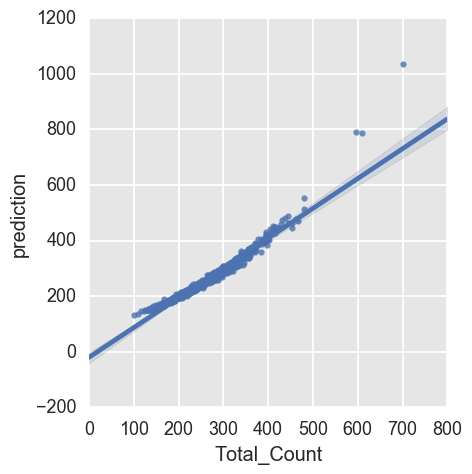

In [29]:
# (y_test.Total_Count, outcomes_pred['prediction']) 
# outcomes_pred.plot.scatter(x='Total_Count',y='prediction');
sb.linearmodels.lmplot(x='Total_Count', y='prediction', data =outcomes_pred, x_jitter=True);

In [30]:
# mse??

In [31]:

# outcomes_pred.groupby('num_awards').mean()

In [32]:
# outcomes_pred.groupby('num_awards').count()

In [33]:
# DF[DF.Total_Count>500]

In [34]:
# http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-25-chi.html

In [35]:
DF.Total_Count.median()

269.0

In [36]:
# DFxy['Tcount_abvMedian'] = (DF.Total_Count>DF.Total_Count.median()).astype(int)

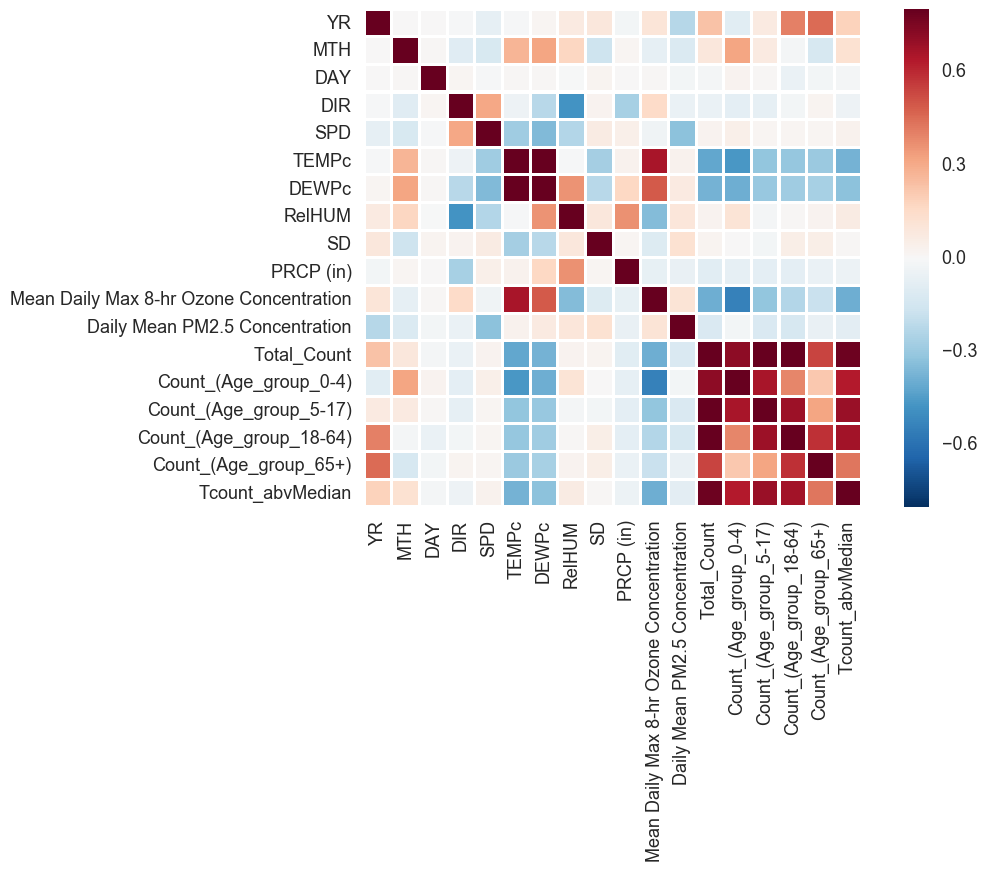

In [37]:
# DF

corrmat = DFxy.corr()

f, ax = plt.subplots(figsize=(12, 9))
# corrmat.columns.get_level_values()
sb.heatmap(corrmat, vmax=.8, square=True, linewidths=1.5);
f.tight_layout()

In [38]:
# DF.TEMPc.hist();

In [39]:
#######################################################

In [40]:
# DFxy

In [41]:
holdoutDF = DFxy[DFxy.YR==2014].reset_index().iloc[:,1:]
# holdoutDF

In [42]:
# del DFxy3H

In [43]:
DFxy3H = holdoutDF[['YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
        'SD','PRCP (in)', 
#         'ln_PRCP', 'ln_SD',
       'Mean Daily Max 8-hr Ozone Concentration',
#        'Daily Mean PM2.5 Concentration', 
#         'sqrt_DmeanPM25conc','sqrt_DmeanOzoneconc',
#        'Tcount_abvMedian',
           'Total_Count', 
#            'ln_Tcount',#]],
#        'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
#        'Count_(Age_group_18-64)', 'Count_(Age_group_65+)',
#        'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
#        'Count_(Age_group_18-64)', 'Count_(Age_group_65+)', 
        'Tcount_abvMedian']]

DFxH = DFxy3H.drop(['Total_Count', 'Tcount_abvMedian'],axis=1)
DFxH = sm.add_constant(DFxH)

DFyH = DFxy3H[['Tcount_abvMedian']]

In [44]:
# DFxH['const']=1
# DFxH = DFxH[['const','YR','MTH','DAY','DIR','SPD','TEMPc','DEWPc','RelHUM','SD','PRCP (in)','Mean Daily Max 8-hr Ozone Concentration']]
# DFxH
# DFyH
# DFxy3H

In [45]:
trainDF = DFxy[DFxy.YR!=2014].reset_index().iloc[:,1:]
# trainDF

In [46]:

DFxy2 = trainDF[['YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
        'SD','PRCP (in)', 
#         'ln_PRCP', 'ln_SD',
       'Mean Daily Max 8-hr Ozone Concentration',
       'Daily Mean PM2.5 Concentration', 
#         'sqrt_DmeanPM25conc','sqrt_DmeanOzoneconc',
#        'Tcount_abvMedian',
#            'Total_Count', 
#            'ln_Tcount',#]],
#        'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
#        'Count_(Age_group_18-64)', 'Count_(Age_group_65+)',
#        'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
#        'Count_(Age_group_18-64)', 'Count_(Age_group_65+)', 
        'Tcount_abvMedian']]

DFx = DFxy2.drop(['Tcount_abvMedian'],axis=1)
DFx = sm.add_constant(DFx)

DFy = DFxy2[['Tcount_abvMedian']]
# DFx
# DFy



In [47]:
from sklearn.cross_validation import train_test_split
# from sklearn.linear_model import #LogisticRegression

X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(DFx, DFy, test_size=0.3,
                                                    random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3,
                                                    random_state=123)
# X_train, X_test, y_train, y_test = train_test_split(DFx, DFy, test_size=0.3,
#                                                     random_state=123)



In [48]:
# DFy.Total_Count.astype(int)
# y_train

In [49]:
# X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y.Sclass.astype(int), test_size=0.3, random_state=4444)
# import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
results = model.fit()
# predict = results.predict(X_test)
print(results.summary())
print(np.exp(results.params))

Optimization terminated successfully.
         Current function value: 0.544184
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:       Tcount_abvMedian   No. Observations:                 1429
Model:                          Logit   Df Residuals:                     1417
Method:                           MLE   Df Model:                           11
Date:                Sun, 30 Oct 2016   Pseudo R-squ.:                  0.2123
Time:                        19:46:40   Log-Likelihood:                -777.64
converged:                       True   LL-Null:                       -987.21
                                        LLR p-value:                 5.247e-83
                                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------------------------
const                                      -2.627

In [50]:
from sklearn.metrics import accuracy_score
predict = results.predict(X_test) 
accuracy_score(y_test, predict.round())

0.69983686786296906

In [55]:
# (classification_report(y_test.Tcount_abvMedian, predict))

In [56]:
DFxy2.Tcount_abvMedian.value_counts()

0    1525
1    1393
Name: Tcount_abvMedian, dtype: int64

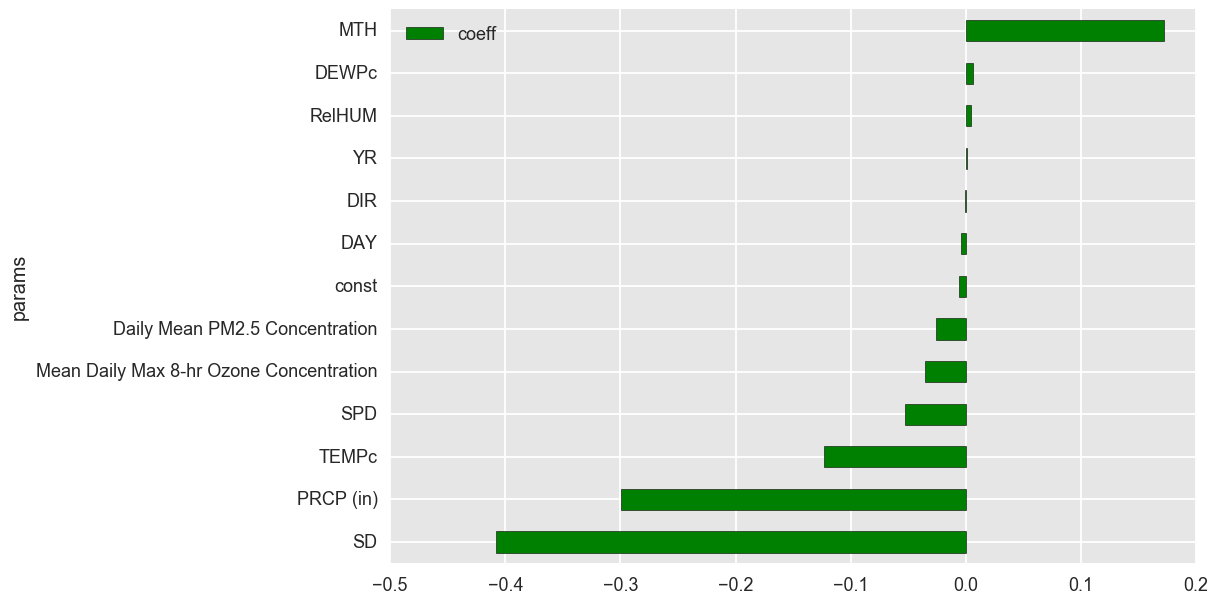

In [57]:
from sklearn.linear_model import LogisticRegression

modelLogReg = LogisticRegression(penalty='l2', C=0.175, random_state=898)
modelLogReg.fit(X_train, y_train.Tcount_abvMedian)

LogisticRegression(C=0.175, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=898, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

pd.DataFrame(list(zip(X_train.columns, modelLogReg.coef_[0])),
             columns=['params','coeff']).sort_values(by=['coeff'], ascending=True).plot.barh(x='params', color='g');

In [ ]:
#######################################################

In [58]:
DFxy3 = trainDF[['YR', 'MTH', 'DAY', 'DIR', 'SPD', 'TEMPc', 'DEWPc', 'RelHUM',
        'SD','PRCP (in)', 
#         'ln_PRCP', 'ln_SD',
       'Mean Daily Max 8-hr Ozone Concentration',
       'Daily Mean PM2.5 Concentration', ##
#         'sqrt_DmeanPM25conc','sqrt_DmeanOzoneconc',
#        'Tcount_abvMedian',
#            'Total_Count', 
#            'ln_Tcount',#]],
#        'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
#        'Count_(Age_group_18-64)', 'Count_(Age_group_65+)',
#        'Count_(Age_group_0-4)', 'Count_(Age_group_5-17)',
#        'Count_(Age_group_18-64)', 'Count_(Age_group_65+)', 
        'Tcount_abvMedian']]

DFx = DFxy3.drop(['Tcount_abvMedian'],axis=1)
DFx = sm.add_constant(DFx)

DFy = DFxy3[['Tcount_abvMedian']]

In [59]:
from sklearn.cross_validation import train_test_split
# from sklearn.linear_model import #LogisticRegression

X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(DFx, DFy, test_size=0.3,
                                                    random_state=123)
X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3,
                                                    random_state=123)
# X_train, X_test, y_train, y_test = train_test_split(DFx, DFy, test_size=0.3,
#                                                     random_state=123)



In [ ]:
#######################################################

In [ ]:
# model = sm.Logit(y_train, X_train)
# results = model.fit()
# # predict = results.predict(X_test)
# print(results.summary())
# print(np.exp(results.params))

In [ ]:
#######################################################

In [60]:
from sklearn import tree,ensemble,cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [62]:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
models = {}
models['Logistic_Regression'] =  LogisticRegression(penalty='l2', C=0.175, random_state=898) #C=1.0 #L1/2
# models['K_nearest_neighbours'] =  KNeighborsClassifier() #(n_neighbors=20)
# models['naive_bayes'] = GaussianNB()
# models['svc'] = SVC(probability=True, C=3)
# models['descision_tree'] = tree.DecisionTreeClassifier()
# models['descision_tree_cart'] = tree.DecisionTreeClassifier()
# models['extratrees'] = tree.ExtraTreeClassifier()
models['RandomForest'] = ensemble.RandomForestClassifier(n_estimators=100,criterion='gini',
                                                         max_depth=5,max_features=3,random_state=898)
# models['adaboostedTrees'] = ensemble.AdaBoostClassifier()
models['gradboostedTrees'] = ensemble.GradientBoostingClassifier(learning_rate=0.05, n_estimators=55, 
                                                                 subsample=0.75, max_depth=5, 
                                                                 max_features=3, random_state=898)

for name, model in models.items():
    scores = cross_validation.cross_val_score(model, X_train, y_train.Tcount_abvMedian, n_jobs=1, cv = 10)
    print('Model: '+name)
    print("Score: " + str(np.mean(scores)))
    print ()

Model: Logistic_Regression
Score: 0.688551481773

Model: gradboostedTrees
Score: 0.762796573536

Model: RandomForest
Score: 0.7410833689



In [63]:
from sklearn.metrics import classification_report

for name, model in models.items():
    
    mFit = model.fit(X_train, y_train)
    y_pred = mFit.predict(X_test)
    
    print('Model: '+name)
    #print(precision_recall_fscore_support(y_test1, y_pred1, average='binary'))
    print(classification_report(y_test.Tcount_abvMedian, y_pred)) #, target_names=list(y_test.unique())))
    print ()



/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model: Logistic_Regression
             precision    recall  f1-score   support

          0       0.68      0.71      0.70       307
          1       0.70      0.66      0.68       306

avg / total       0.69      0.69      0.69       613


Model: gradboostedTrees
             precision    recall  f1-score   support

          0       0.72      0.73      0.73       307
          1       0.73      0.72      0.72       306

avg / total       0.73      0.73      0.73       613


Model: RandomForest
             precision    recall  f1-score   support

          0       0.75      0.68      0.72       307
          1       0.71      0.77      0.74       306

avg / total       0.73      0.73      0.73       613




In [64]:
def plot_roc_curves(fpr,tpr):
    plt.plot(fpr, tpr);
    #plt.plot(fpr,fpr, 'r--');
    plt.xlabel("False Positive Rate (1 - Specificity)");
    plt.ylabel("True Positive Rate (Sensitivity)");
    #plt.legend(list(models.keys()))

In [ ]:
# len(list(models.items()))

/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model: Logistic_Regression
AUC:   0.75181494965

Model: gradboostedTrees
AUC:   0.825551936301

Model: RandomForest
AUC:   0.819228885908



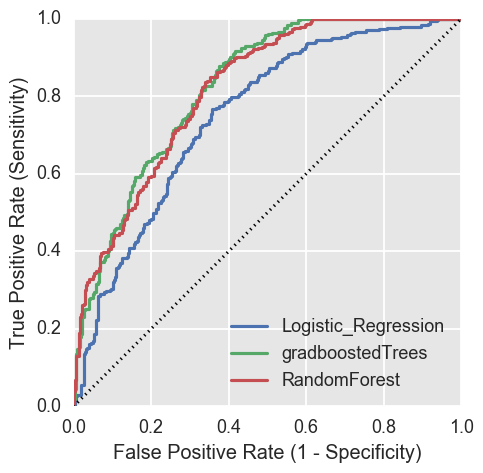

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve

cnt=0
for name, model in models.items():
    
    mFit = model.fit(X_train, y_train)
    y_pred_prob = mFit.predict_proba(X_test)[:,1]
    #y_pred = mFit.predict(X_holdout)
    
    print('Model: '+name)
    print('AUC:  ', roc_auc_score(y_test,y_pred_prob))
    #print('AUC:  ', roc_auc_score(y_holdout,y_pred))
    
    fpr, tpr, thresholds = roc_curve(y_test,y_pred_prob,pos_label=1)
    #fpr, tpr, thresholds = roc_curve(y_holdout,y_pred,pos_label=1)
    
    cnt+=1
    plt.figure(1,figsize=[5,5])
    plt.subplot(1,1,1)
    plot_roc_curves(fpr,tpr)
    plt.legend(list(models.keys()),loc='best')
    print()

    if cnt >= len(list(models.items())):
        plt.plot(fpr,fpr, 'k:');
        

#     https://www.kaggle.com/wiki/AreaUnderCurve

/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/hrm/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Model: Logistic_Regression
AUC:   0.776936128005

Model: gradboostedTrees
AUC:   0.859398084101

Model: RandomForest
AUC:   0.848978100285



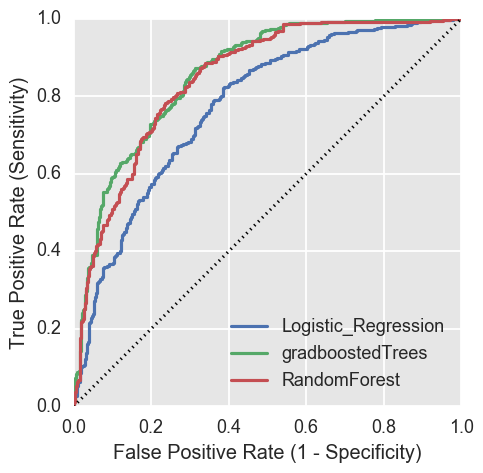

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve

cnt=0
for name, model in models.items():
    
    mFit = model.fit(X_train, y_train)
    #y_pred = mFit.predict(X_test)
    y_pred_prob = mFit.predict_proba(X_holdout)[:,1]
    
    print('Model: '+name)
    #print('AUC:  ', roc_auc_score(y_test,y_pred))
    print('AUC:  ', roc_auc_score(y_holdout,y_pred_prob))
    
    #fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label=1)
    fpr, tpr, thresholds = roc_curve(y_holdout,y_pred_prob,pos_label=1)
    
    cnt+=1
    plt.figure(1,figsize=[5,5])
    plt.subplot(1,1,1)
    plot_roc_curves(fpr,tpr)
    plt.legend(list(models.keys()),loc='best')
    print()

    if cnt >= len(list(models.items())):
        plt.plot(fpr,fpr, 'k:');

#     https://www.kaggle.com/wiki/AreaUnderCurve

In [68]:
modelLogReg = LogisticRegression(penalty='l2', C=0.175, random_state=898)
modelLogReg.fit(X_train, y_train.Tcount_abvMedian)

LogisticRegression(C=0.175, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=898, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

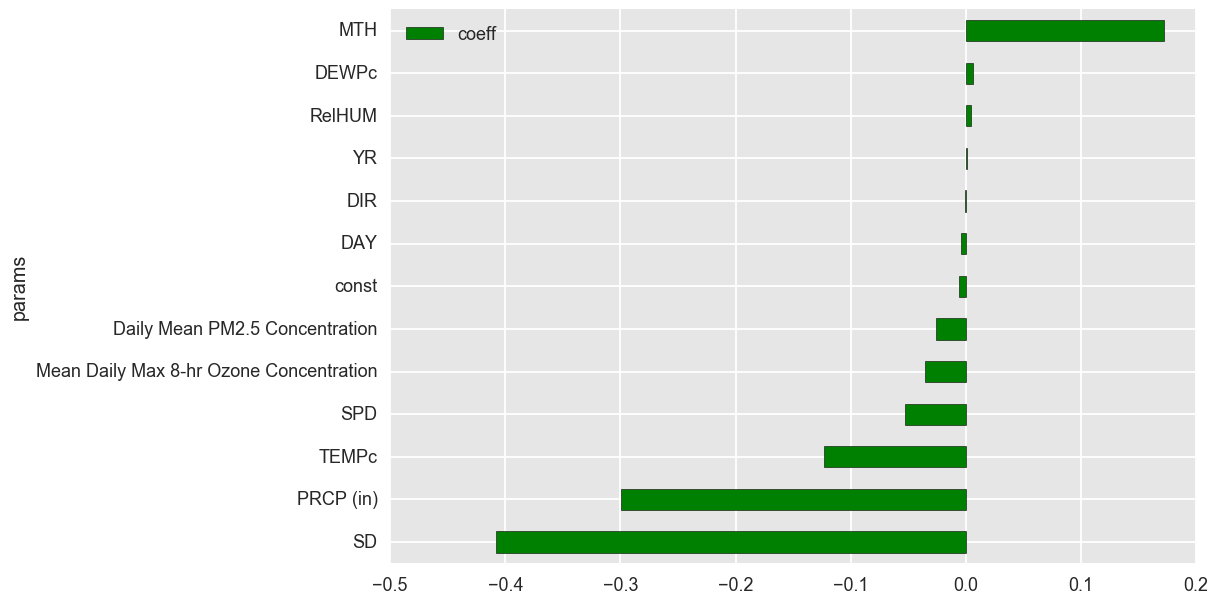

In [69]:
pd.DataFrame(list(zip(X_train.columns, modelLogReg.coef_[0])),
             columns=['params','coeff']).sort_values(by=['coeff'], ascending=True).plot.barh(x='params', color='g');

In [70]:
modelRF = ensemble.RandomForestClassifier(n_estimators=100,criterion='gini',
                                                         max_depth=5,max_features=3,random_state=898)
modelRF.fit(X_train, y_train.Tcount_abvMedian)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=3, max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=898, verbose=0, warm_start=False)

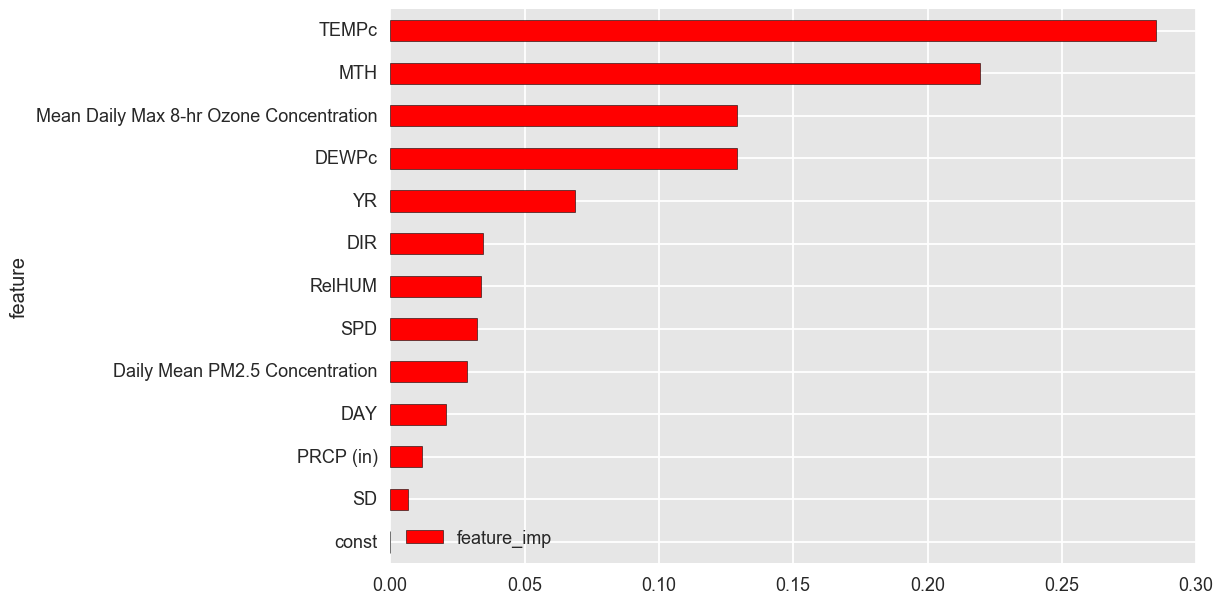

In [71]:
pd.DataFrame(list(zip(X_train.columns, modelRF.feature_importances_)), 
              columns=['feature','feature_imp']).sort_values(by=['feature_imp'], 
                                                             ascending=True).plot.barh(x='feature', color='r');

In [72]:
modelGBT = ensemble.GradientBoostingClassifier(learning_rate=0.05, n_estimators=55, 
                                                                 subsample=0.75, max_depth=5, 
                                                                 max_features=3, random_state=898)
modelGBT.fit(X_train, y_train.Tcount_abvMedian)

GradientBoostingClassifier(init=None, learning_rate=0.05, loss='deviance',
              max_depth=5, max_features=3, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=55,
              presort='auto', random_state=898, subsample=0.75, verbose=0,
              warm_start=False)

In [ ]:
# modelGBT.feature_importances_

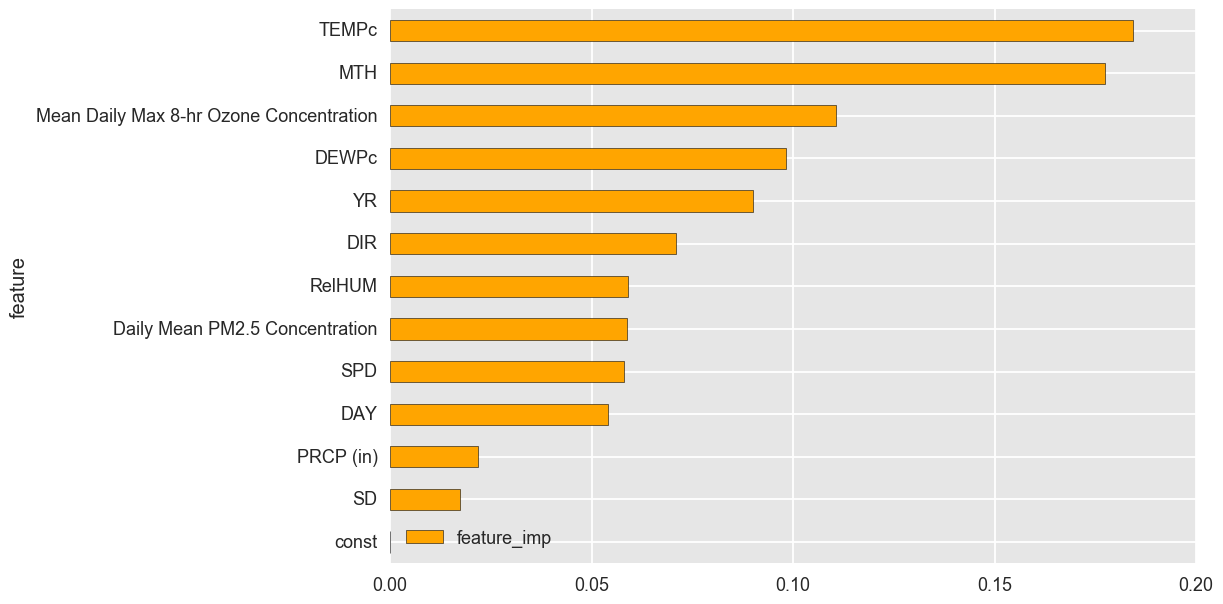

In [73]:
pd.DataFrame(list(zip(X_train.columns, modelGBT.feature_importances_)), 
              columns=['feature','feature_imp']).sort_values(by=['feature_imp'], 
                                                             ascending=True).plot.barh(x='feature', color='orange');

In [74]:
y_pred = modelGBT.predict(X_holdout)

In [75]:
from sklearn.metrics import confusion_matrix

# cnf_matrix = confusion_matrix(y_test,y_pred)
cnf_matrix = confusion_matrix(y_holdout,y_pred) ## depending on the y_pred outcome
cnf_matrix

array([[334, 121],
       [ 86, 335]])

In [76]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion matrix, without normalization
[[334 121]
 [ 86 335]]
Normalized confusion matrix
[[ 0.73406593  0.26593407]
 [ 0.20427553  0.79572447]]


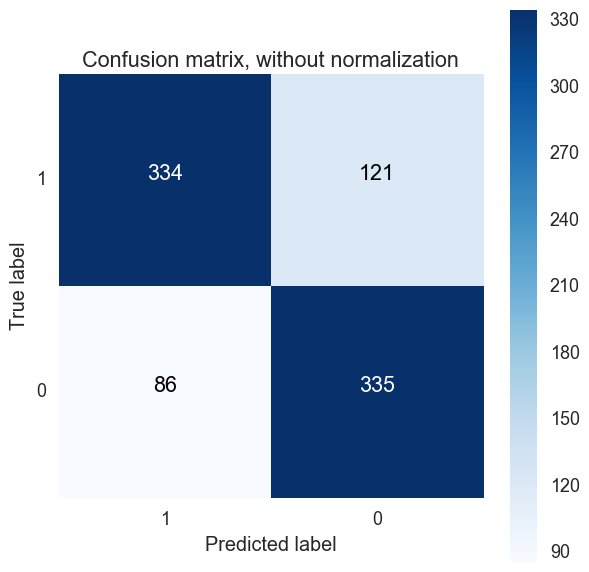

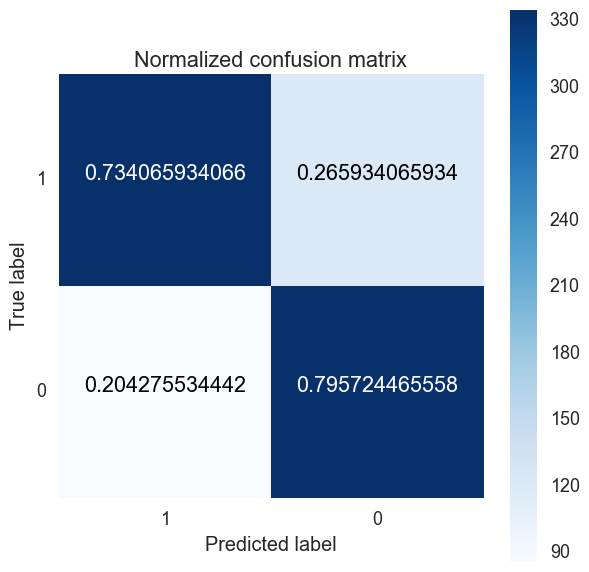

In [77]:
plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrix, classes=y_test.Tcount_abvMedian.unique(),
                      title='Confusion matrix, without normalization')
plt.grid(None)

# Plot normalized confusion matrix
plt.figure(figsize=[6,6])
plot_confusion_matrix(cnf_matrix, classes=y_test.Tcount_abvMedian.unique(), normalize=True,
                      title='Normalized confusion matrix')
plt.grid(None)
plt.show()

In [ ]:

# from sklearn.metrics import roc_auc_score, roc_curve

# fpr, tpr, thresholds = roc_curve(y_test,y_pred,pos_label=1)

# plt.plot(fpr, tpr);
# plt.plot(fpr,fpr, 'r--');
# plt.xlabel("False Positive Rate (1 - Specificity)");
# plt.ylabel("True Positive Rate (Sensitivity)");
# plt.ylim([0,1.01]);

In [78]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
#     plt.plot(precisionvec,recallvec)
#     plt.axis([0, 1, 0, 1])
#     plt.xlabel("precision")
#     plt.ylabel("recall")
    return (recallvec, precisionvec, threshvec)

In [79]:
recallvec, precisionvec, threshvec = pr_curve(y_holdout.Tcount_abvMedian, y_pred); # depending on y_pred

recall_ser = pd.Series(recallvec)
precision_ser = pd.Series(precisionvec)
thresh_ser = pd.Series(threshvec)

pr_df = pd.DataFrame(recall_ser, columns=['recall'])
pr_df['precision'] = precision_ser
pr_df['threshold'] = thresh_ser
pr_df

,recall,precision,threshold
0,1.000000,0.480594,0
1,0.795724,0.734649,1


https://en.wikipedia.org/wiki/Precision_and_recall

http://scikit-learn.org/stable/auto_examples/model_selection/randomized_search.html
http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_digits.html

In [80]:
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
# modelRF = ensemble.RandomForestClassifier(n_estimators=100,criterion='gini',
#                                                          max_depth=5,max_features=3,random_state=898)
# modelRF.fit(X_train, y_train.Tcount_abvMedian)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X_train_full, y_train_full, test_size=0.3,
#                                                     random_state=123)

# for name,model in models.items():
#     model.fit(X_train,y_train.Tcount_abvMedian)
#     print('Model: '+name)
#     print("Score: " + str(model.score(X_test,y_test)))
#     if (name == "gradboostedTrees" or name == "RandomForest"):
#         sorted_features = sorted(zip(X_train.columns, modelGBT.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
#     else:
#         sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
#     for feature in sorted_features:
#         print(feature)
        
#     print("")

In [81]:
shuffler = cross_validation.ShuffleSplit(n=100, n_iter=10)

for name,model in models.items(): #models.iteritems():
    score = cross_validation.cross_val_score(model, X_train, y_train.Tcount_abvMedian, n_jobs=1, cv=shuffler)
    print('Model: ' + name)
    print(score)
    print("Score: " + str(np.mean(score)) + " with STD: " + str(np.std(score)))
    
    if (name == "gradboostedTrees" or name == "RandomForest"):
        sorted_features = sorted(zip(X_train.columns, modelGBT.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    else:
        sorted_features = sorted(zip(X_train.columns, model.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
    
    #sorted_features = sorted(zip(D2.feature_names,model.coef_), key=lambda tup: abs(tup[1]), reverse=True)
    for feature in sorted_features:
        print(feature)
        
    print("")

Model: Logistic_Regression
[ 0.9  0.7  0.8  0.7  0.6  0.8  0.5  0.6  0.6  0.9]
Score: 0.71 with STD: 0.13
('SD', -0.40788499953448315)
('PRCP (in)', -0.29983192338599562)
('MTH', 0.17181911328019242)
('TEMPc', -0.12310236166413457)
('SPD', -0.052745145752331059)
('Mean Daily Max 8-hr Ozone Concentration', -0.035849998072276269)
('Daily Mean PM2.5 Concentration', -0.025843881918662274)
('DEWPc', 0.0064897663970647102)
('const', -0.0064357931948432591)
('RelHUM', 0.0043813208225782184)
('DAY', -0.0039521401667546125)
('DIR', -0.00080647352615443484)
('YR', 0.00062372418160661352)

Model: gradboostedTrees
[ 0.7  0.8  0.8  0.5  0.6  0.8  0.8  0.5  0.6  0.6]
Score: 0.67 with STD: 0.11874342087
('TEMPc', 0.18434611051010252)
('MTH', 0.17724489192963544)
('Mean Daily Max 8-hr Ozone Concentration', 0.11050964611161747)
('DEWPc', 0.098154504570460918)
('YR', 0.089917982175702252)
('DIR', 0.070984331189461569)
('RelHUM', 0.058953926967938899)
('Daily Mean PM2.5 Concentration', 0.0588809672336121

In [82]:
## THIS WORKS FOR LINEAR MODELS -- For Tree Models solvers might need to be default 

from sklearn import cross_validation

import matplotlib.pyplot as plt
%matplotlib inline

def plot_overfit(X,y,model_obj,param_ranges,param_static=None): 
    for parameter,parameter_range in param_ranges.items():
        avg_train_score, avg_test_score = [],[]
        std_train_score, std_test_score = [],[]
        
        for param_val in parameter_range:
            param = {parameter:param_val}
            if param_static:
                param.update(param_static)
                
            model = model_obj(**param)
            
            train_scores,test_scores = [],[]
            for i in range(5):
                X_train,X_test,y_train,y_test = cross_validation.train_test_split(X,y,test_size = .5)
                model.fit(X_train,y_train)
                
                train_scores.append(model.score(X_train,y_train))
                test_scores.append(model.score(X_test,y_test))
            
            avg_train_score.append(np.mean(train_scores))
            avg_test_score.append(np.mean(test_scores))
            
            std_train_score.append(np.std(train_scores))
            std_test_score.append(np.std(test_scores))
            
        fig,ax = plt.subplots()
        ax.errorbar(parameter_range,avg_train_score,yerr=std_train_score,label='training score')
        ax.errorbar(parameter_range,avg_test_score,yerr=std_test_score,label='testing score')
        
        ax.set_xlabel(parameter)
        ax.set_ylabel('score')
        ax.legend(loc=0)

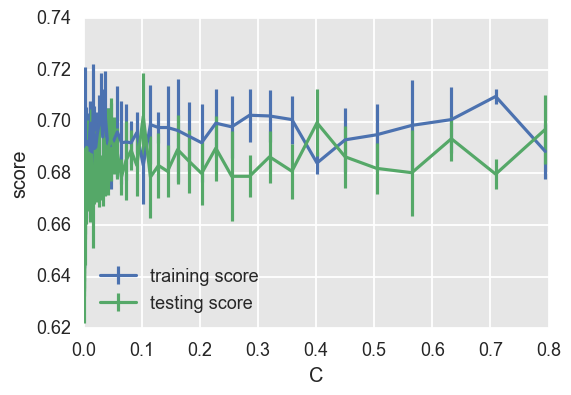

In [83]:
modelLogReg = LogisticRegression#() # figure out the best C -- regularization to use
# modelLogReg.fit(X_train, y_train.Tcount_abvMedian)

LogRegparameters = {'C':np.logspace(-4,-.1,80)}

plot_overfit(X_train, y_train.Tcount_abvMedian, modelLogReg, LogRegparameters)

In [84]:
grid_searchLogReg = GridSearchCV(modelLogReg(), LogRegparameters)
grid_searchLogReg.fit(X_train, y_train.Tcount_abvMedian)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-04,   1.12038e-04, ...,   7.08978e-01,   7.94328e-01])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [85]:
grid_searchLogReg.best_params_

{'C': 0.25487610046710757}

In [86]:
grid_searchLogReg.best_score_

0.68649405178446465

In [87]:
sorted_features = sorted(zip(X_train.columns, grid_searchLogReg.best_estimator_.coef_[0]), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

[('SD', -0.40772373130304462),
 ('PRCP (in)', -0.31314859944568579),
 ('MTH', 0.17100240432341227),
 ('TEMPc', -0.11750320296730633),
 ('SPD', -0.052011928112704026),
 ('Mean Daily Max 8-hr Ozone Concentration', -0.03288750355373405),
 ('Daily Mean PM2.5 Concentration', -0.025920848877713763),
 ('const', -0.0058749898603173032),
 ('RelHUM', 0.0055939176141224607),
 ('DAY', -0.0039393140345066729),
 ('DEWPc', 0.0011153777619361061),
 ('DIR', -0.00082178876648182349),
 ('YR', 0.0005660591729358443)]

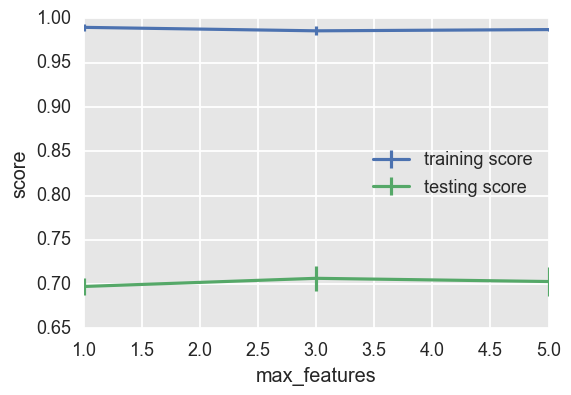

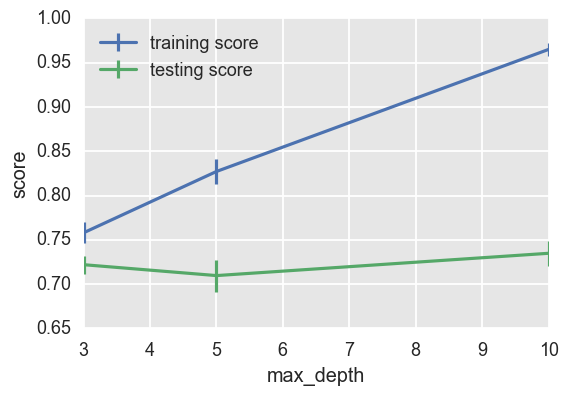

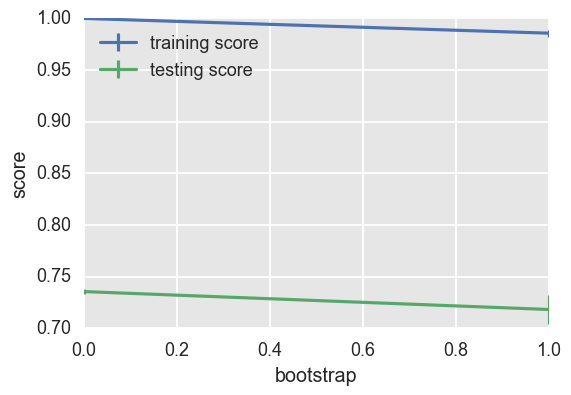

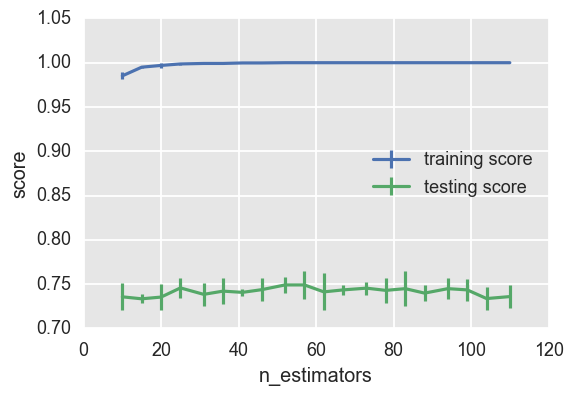

In [88]:
modelRF = ensemble.RandomForestClassifier #(n_estimators=100,criterion='gini',
#                                                          max_depth=5,max_features=3,random_state=898)
# modelRF.fit(X_train, y_train.Tcount_abvMedian)

RFparameters = {'n_estimators': np.linspace(10,110,20).astype(int), 
              'max_depth': [3,5,10],
              'max_features': [1,3,5],
              "bootstrap": [True, False],
#               "criterion": ["gini", "entropy"],
#               'random_state': [898, 123]
             }

plot_overfit(X_train, y_train.Tcount_abvMedian, modelRF, RFparameters)


In [89]:
grid_searchRF = GridSearchCV(modelRF(), param_grid=RFparameters)

In [90]:
grid_searchRF.fit(X_train, y_train.Tcount_abvMedian)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_features': [1, 3, 5], 'max_depth': [3, 5, 10], 'bootstrap': [True, False], 'n_estimators': array([ 10,  15,  20,  25,  31,  36,  41,  46,  52,  57,  62,  67,  73,
        78,  83,  88,  94,  99, 104, 110])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [91]:
grid_searchRF.best_params_

{'bootstrap': True, 'max_depth': 10, 'max_features': 5, 'n_estimators': 73}

In [92]:
grid_searchRF.best_score_

0.76766969909027294

In [93]:
print(grid_searchRF.best_estimator_.feature_importances_.argmax())

list(zip(X_train.columns, grid_searchRF.best_estimator_.feature_importances_))

6


[('const', 0.0),
 ('YR', 0.072839826107474331),
 ('MTH', 0.19147417371320113),
 ('DAY', 0.058906017313536972),
 ('DIR', 0.06365260951474791),
 ('SPD', 0.056958282560537206),
 ('TEMPc', 0.20631610089845229),
 ('DEWPc', 0.096677736019630339),
 ('RelHUM', 0.062671491102946383),
 ('SD', 0.012370245689323441),
 ('PRCP (in)', 0.02347067087001474),
 ('Mean Daily Max 8-hr Ozone Concentration', 0.088212171987997856),
 ('Daily Mean PM2.5 Concentration', 0.066450674222137504)]

In [94]:
sorted_features = sorted(zip(X_train.columns, grid_searchRF.best_estimator_.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

[('TEMPc', 0.20631610089845229),
 ('MTH', 0.19147417371320113),
 ('DEWPc', 0.096677736019630339),
 ('Mean Daily Max 8-hr Ozone Concentration', 0.088212171987997856),
 ('YR', 0.072839826107474331),
 ('Daily Mean PM2.5 Concentration', 0.066450674222137504),
 ('DIR', 0.06365260951474791),
 ('RelHUM', 0.062671491102946383),
 ('DAY', 0.058906017313536972),
 ('SPD', 0.056958282560537206),
 ('PRCP (in)', 0.02347067087001474),
 ('SD', 0.012370245689323441),
 ('const', 0.0)]

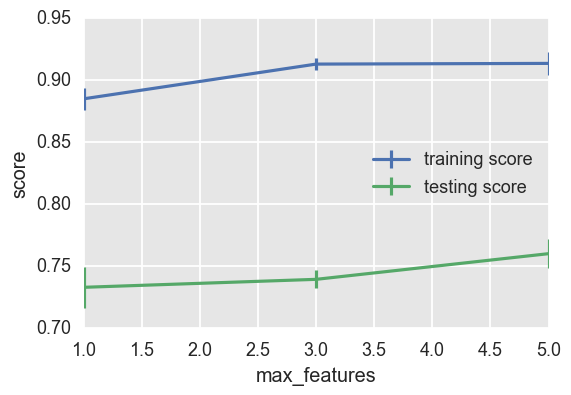

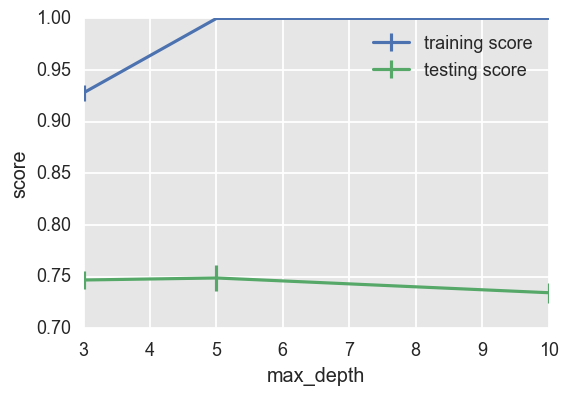

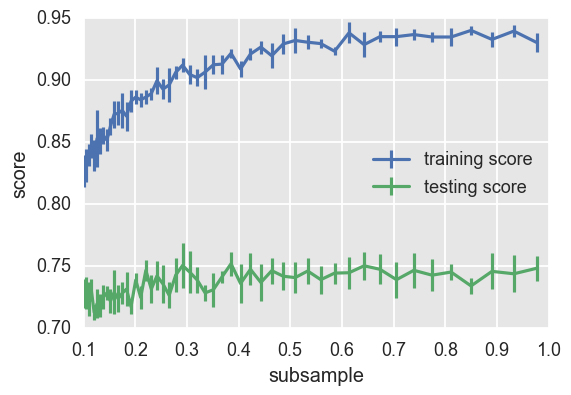

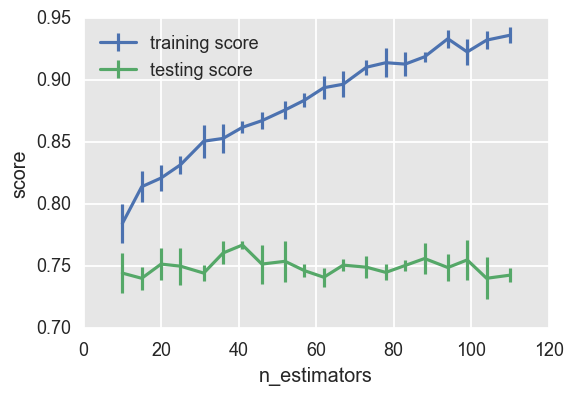

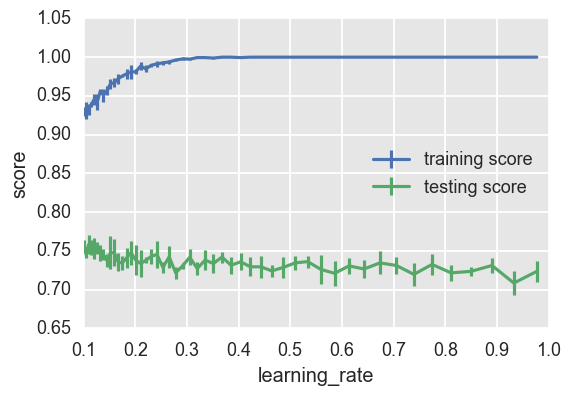

In [95]:
modelGBT = ensemble.GradientBoostingClassifier #(learning_rate=0.05, n_estimators=55, 
#                                                                  subsample=0.75, max_depth=5, 
#                                                                  max_features=3, random_state=898)
# modelGBT.fit(X_train, y_train.Tcount_abvMedian)

GBTparameters = {'n_estimators': np.linspace(10,110,20).astype(int), 
              'max_depth': [3,5,10],
              'max_features': [1,3,5],
#               "bootstrap": [True, False],
              'learning_rate' : np.logspace(-1,-.01,50),
              'subsample': np.logspace(-1,-.01,50),
#               "criterion": ["gini", "entropy"],
#               'random_state': [898, 123]
             }

plot_overfit(X_train, y_train.Tcount_abvMedian, modelGBT, GBTparameters)

In [96]:
GBTparameters = {'n_estimators': [20,40,60,80, 100], #np.linspace(10,110,20).astype(int), 
              'max_depth': [3,5,7,10],
              'max_features': [1,3,5],
#               "bootstrap": [True, False],
              'learning_rate' : [0.1, 0.15, 0.2, 0.3], #np.logspace(-1,-.01,50),
              'subsample': [0.7, 0.75, 0.8], #np.logspace(-1,-.01,50),
#               "criterion": ["gini", "entropy"],
#               'random_state': [898, 123]
             }

In [ ]:
grid_searchGBT = GridSearchCV(modelGBT(), param_grid=GBTparameters)

In [ ]:
grid_searchGBT.fit(X_train, y_train.Tcount_abvMedian)

In [ ]:
grid_searchGBT.best_params_

In [ ]:
grid_searchGBT.best_score_

In [ ]:
grid_searchGBT.best_estimator_.feature_importances_.argmax()

list(zip(X_train.columns, grid_searchGBT.best_estimator_.feature_importances_))

In [ ]:
sorted_features = sorted(zip(X_train.columns, grid_searchGBT.best_estimator_.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
sorted_features

In [ ]:
# DFx

In [ ]:
# DFxH['const']=1
# DFxH = DFxH[['const','YR','MTH','DAY','DIR','SPD','TEMPc','DEWPc','RelHUM','SD','PRCP (in)','Mean Daily Max 8-hr Ozone Concentration']]
# DFxH
# DFyH
# DFxy3H

In [ ]:
# {'C': 0.046325784738351104}

In [ ]:
modelLogReg = LogisticRegression(C=0.046) # figure out the best C -- regularization to use

modelLogReg.fit(X_train, y_train.Tcount_abvMedian)

y_LogRpred = modelLogReg.predict(X_test)
print('Training_train-test')
print(classification_report(y_test.Tcount_abvMedian, y_LogRpred))

y_LogRpredholdout = modelLogReg.predict(X_holdout)
print('Training_Holdout')
print(classification_report(y_holdout.Tcount_abvMedian, y_LogRpredholdout))

y_LogRpredHO = modelLogReg.predict(DFxH)
print('Testing_Holdout')
print(classification_report(DFyH.Tcount_abvMedian, y_LogRpredHO))

In [ ]:
# {'bootstrap': True, 'max_depth': 10, 'max_features': 3, 'n_estimators': 67}

In [ ]:
modelRF = ensemble.RandomForestClassifier(n_estimators=67,criterion='gini', bootstrap=True,
                                                         max_depth=10,max_features=3,random_state=898)
modelRF.fit(X_train, y_train.Tcount_abvMedian)

y_RFpred = modelRF.predict(X_test)
print('Training_train-test')
print(classification_report(y_test.Tcount_abvMedian, y_RFpred))

y_RFpredholdout = modelRF.predict(X_holdout)
print('Training_Holdout')
print(classification_report(y_holdout.Tcount_abvMedian, y_RFpredholdout))

y_RFpredHO = modelRF.predict(DFxH)
print('Testing_Holdout')
print(classification_report(DFyH.Tcount_abvMedian, y_RFpredHO))

In [ ]:
# {'learning_rate': 0.1,
#  'max_depth': 5,
#  'max_features': 3,
#  'n_estimators': 80,
#  'subsample': 0.75}

In [ ]:
modelGBT = ensemble.GradientBoostingClassifier(learning_rate=0.1, n_estimators=80, 
                                                                 subsample=0.75, max_depth=5, 
                                                                 max_features=3, random_state=898)
modelGBT.fit(X_train, y_train.Tcount_abvMedian)

y_GBTpred = modelGBT.predict(X_test)
print('Training_train-test')
print(classification_report(y_test.Tcount_abvMedian, y_GBTpred))

y_GBTpredholdout = modelGBT.predict(X_holdout)
print('Training_Holdout')
print(classification_report(y_holdout.Tcount_abvMedian, y_GBTpredholdout))

y_GBTpredHO = modelGBT.predict(DFxH)
print('Testing_Holdout')
print(classification_report(DFyH.Tcount_abvMedian, y_GBTpredHO))

In [ ]:
import pickle
pickle.dump( modelGBT, open( "modelGBT.p", "wb" ) )
pickle.dump( modelRF, open( "modelRF.p", "wb" ) )
pickle.dump( modelLogReg, open( "modelLogReg.p", "wb" ) )

In [ ]:
import datetime as dt
dt.datetime.strftime()

In [ ]:
# ypred_GBT =  
# pd.DataFrame(y_GBTpredHO, columns=['GBTpredict2014'])
# GBTpredict2014

In [ ]:
# DFxy3H['date']=
date=[]
for n in range(len(DFxy3H)):
    if (DFxy3H.MTH[n]>=10 and DFxy3H.DAY[n]>=10):
        date.append( format(DFxy3H.YR[n])+'-'+format(DFxy3H.MTH[n])+'-'+format(DFxy3H.DAY[n]) )
    elif (DFxy3H.MTH[n]<10 and DFxy3H.DAY[n]>=10):
        date.append( format(DFxy3H.YR[n])+'-0'+format(DFxy3H.MTH[n])+'-'+format(DFxy3H.DAY[n]) )
    elif (DFxy3H.MTH[n]>=10 and DFxy3H.DAY[n]<10):
        date.append( format(DFxy3H.YR[n])+'-'+format(DFxy3H.MTH[n])+'-0'+format(DFxy3H.DAY[n]) )
    elif (DFxy3H.MTH[n]<10 and DFxy3H.DAY[n]<10):
        date.append( format(DFxy3H.YR[n])+'-0'+format(DFxy3H.MTH[n])+'-0'+format(DFxy3H.DAY[n]) )
        
# date
DFxy3H['date']= pd.DataFrame(date)

# DFxy3H

In [ ]:
cols = DFxy3H.columns.tolist()
cols = cols[-1:] + cols[:-1]
DFxy3H = DFxy3H[cols]
DFxy3H=DFxy3H.rename(columns = {'PRCP (in)':'PRCP'})
DFxy3H

In [ ]:
df = pd.DataFrame(DFxy3H)
df['GBTpredict2014'] = y_GBTpredHO
df['GBTacc'] = df.Tcount_abvMedian==y_GBTpredHO
# df['RFpredict2014'] = y_RFpredHO
# df['LogRpredict2014'] = y_LogRpredHO

# df[100:200]
df.to_csv('HoldoutDF_withGBTpredict.csv', index=False)


In [ ]:
# DFxy3H.index = DFxy3H.YR


In [ ]:
plt.figure(figsize=[15,25])
plt.subplot(10,1,1)
DFxy3H.TEMPc.plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Temperature (degC)');

plt.subplot(10,1,2)
DFxy3H.DEWPc.plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Dew Point (degC)');

plt.subplot(10,1,3)
DFxy3H.RelHUM.plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Relative Humidity (%)');

plt.subplot(10,1,4)
DFxy3H['PRCP (in)'].plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Precipitation (in)');

plt.subplot(10,1,5)
DFxy3H.SD.plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Snow Depth (in)');

plt.subplot(10,1,6)
DFxy3H['Mean Daily Max 8-hr Ozone Concentration'].plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Mean Daily Max 8-hr Ozone Concentration (ppm)');

plt.subplot(10,1,7)
DFxy['Daily Mean PM2.5 Concentration'].plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Daily Mean PM2.5 Concentration (ug/m3 LC)');

plt.subplot(10,1,8)
DFxy3H.SPD.plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Wind Speed & Gust (mph)');

plt.subplot(10,1,9)
DFxy3H.DIR.plot.bar();
plt.xticks([]);
plt.xlabel('');
plt.title('Wind Direction (deg.)');

plt.subplot(10,1,10)
DFxy3H.Total_Count.plot.bar(x= DFxy3H.YR.astype(str));
plt.xticks([]);
plt.xlabel('');
plt.title('Total ED Visits for Asthma');

In [ ]:
# DFxy3H[['YR','Total_Count']].plot.line(y='Total_Count');

In [ ]:
# DFxy3[['TEMPc','MTH','DEWPc','Mean Daily Max 8-hr Ozone Concentration','Tcount_abvMedian']]

In [ ]:
Due to the unplanned nature of patient attendance, the department must provide initial treatment for a broad spectrum of illnesses and injuries, some of which may be life-threatening and require immediate attention. In some countries, emergency departments have become important entry points for those without other means of access to medical care.